In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

In [6]:
try :
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error') 
else:
    soup = BeautifulSoup(html.read(), 'html.parser')

In [10]:
table = soup.find('table', {'class' : 'tData01 tt'})

In [48]:
# 데이터 추출
name = []
avg = []
h = []
hr = []
rbi = []

data = []

for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    for td in tds :
        if td.find('a'):
            data.append([td.find('a').text, tds[3].text, tds[8].text, tds[11].text, tds[13].text])
data

[['최형우', '0.354', '185', '28', '115'],
 ['손아섭', '0.352', '190', '11', '85'],
 ['로하스', '0.349', '192', '47', '135'],
 ['박민우', '0.345', '161', '8', '63'],
 ['페르난데스', '0.340', '199', '21', '105'],
 ['이정후', '0.333', '181', '15', '101'],
 ['허경민', '0.332', '145', '7', '58'],
 ['김현수', '0.331', '181', '22', '119'],
 ['강백호', '0.330', '165', '23', '89'],
 ['양의지', '0.328', '151', '33', '124'],
 ['나성범', '0.324', '170', '34', '112'],
 ['황재균', '0.312', '169', '21', '97'],
 ['김동엽', '0.312', '129', '20', '74'],
 ['오재일', '0.312', '147', '16', '89'],
 ['구자욱', '0.307', '137', '15', '78'],
 ['최주환', '0.306', '156', '16', '88'],
 ['터커', '0.306', '166', '32', '113'],
 ['박석민', '0.306', '109', '14', '63'],
 ['이명기', '0.306', '146', '2', '45'],
 ['김하성', '0.306', '163', '30', '109'],
 ['김상수', '0.304', '123', '5', '47'],
 ['박건우', '0.304', '148', '14', '70'],
 ['오지환', '0.300', '158', '10', '71'],
 ['정수빈', '0.298', '146', '5', '59'],
 ['조용호', '0.296', '121', '0', '32'],
 ['정훈', '0.295', '121', '11', '58'],
 ['채은성', 

In [58]:
for d in data :
    print(d[1])

0.354
0.352
0.349
0.345
0.340
0.333
0.332
0.331
0.330
0.328
0.324
0.312
0.312
0.312
0.307
0.306
0.306
0.306
0.306
0.306
0.304
0.304
0.300
0.298
0.296
0.295
0.293
0.292
0.291
0.290


In [59]:
# csv 파일 저장
with open('baseball.csv', 'w', encoding='utf-8') as file:
    for d in data:
        file.write('{},{},{},{},{}\n'.format(d[0],d[1],d[2],d[3],d[4]))
print('file save done :)')

file save done :)


In [38]:
import pandas as pd
import numpy as np

In [60]:
load_data = pd.read_csv('./baseball.csv', header=None, encoding='utf-8')
load_data

,0,1,2,3,4
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105
5,이정후,0.333,181,15,101
6,허경민,0.332,145,7,58
7,김현수,0.331,181,22,119
8,강백호,0.330,165,23,89
9,양의지,0.328,151,33,124


In [61]:
baseballDF = pd.DataFrame({
    'player' : load_data[0],
    'bat_avg': load_data[1],
    'hit'    : load_data[2],
    'homerun': load_data[3],
    'rbi'    : load_data[4],
})
baseballDF

,player,bat_avg,hit,homerun,rbi
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105
5,이정후,0.333,181,15,101
6,허경민,0.332,145,7,58
7,김현수,0.331,181,22,119
8,강백호,0.330,165,23,89
9,양의지,0.328,151,33,124


In [62]:
baseballDF.to_csv('baseballDF.csv', mode='w', encoding='utf-8')

In [63]:
# DB 입력

In [65]:
import pymongo as mongo

In [66]:
conn = mongo.MongoClient()

In [71]:
baseballDB = conn.baseballDB
baseballDB

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'baseballDB')

In [72]:
baseballCollection = baseballDB['baseball']
baseballCollection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'baseballDB'), 'baseball')

In [70]:
baseball_info_list = []

for idx, obj in enumerate(data):
    #print(idx, obj)
    baseball_info_list.append({
        'number' : idx,
        'player' : obj[0],
        'bat_avg': obj[1],
        'hit'    : obj[2],
        'homerun': obj[3],
        'rbi'    : obj[4]
    })

In [75]:
baseballCollection.insert_many(baseball_info_list)

BulkWriteError: batch op errors occurred, full error: {'writeErrors': [{'index': 0, 'code': 11000, 'keyPattern': {'_id': 1}, 'keyValue': {'_id': ObjectId('60482c2903f297121a096883')}, 'errmsg': "E11000 duplicate key error collection: baseballDB.baseball index: _id_ dup key: { _id: ObjectId('60482c2903f297121a096883') }", 'op': {'number': 0, 'player': '최형우', 'bat_avg': '0.354', 'hit': '185', 'homerun': '28', 'rbi': '115', '_id': ObjectId('60482c2903f297121a096883')}}], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 0, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': []}

In [76]:
cursor = baseballCollection.find()
for c in cursor:
    print(c)

{'_id': ObjectId('60482c2903f297121a096883'), 'number': 0, 'player': '최형우', 'bat_avg': '0.354', 'hit': '185', 'homerun': '28', 'rbi': '115'}
{'_id': ObjectId('60482c2903f297121a096884'), 'number': 1, 'player': '손아섭', 'bat_avg': '0.352', 'hit': '190', 'homerun': '11', 'rbi': '85'}
{'_id': ObjectId('60482c2903f297121a096885'), 'number': 2, 'player': '로하스', 'bat_avg': '0.349', 'hit': '192', 'homerun': '47', 'rbi': '135'}
{'_id': ObjectId('60482c2903f297121a096886'), 'number': 3, 'player': '박민우', 'bat_avg': '0.345', 'hit': '161', 'homerun': '8', 'rbi': '63'}
{'_id': ObjectId('60482c2903f297121a096887'), 'number': 4, 'player': '페르난데스', 'bat_avg': '0.340', 'hit': '199', 'homerun': '21', 'rbi': '105'}
{'_id': ObjectId('60482c2903f297121a096888'), 'number': 5, 'player': '이정후', 'bat_avg': '0.333', 'hit': '181', 'homerun': '15', 'rbi': '101'}
{'_id': ObjectId('60482c2903f297121a096889'), 'number': 6, 'player': '허경민', 'bat_avg': '0.332', 'hit': '145', 'homerun': '7', 'rbi': '58'}
{'_id': ObjectId

In [10]:
# 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [79]:
import warnings
warnings.filterwarnings(action='ignore')

In [84]:
baseballDF = baseballDF.set_index('player')

<Figure size 432x288 with 0 Axes>

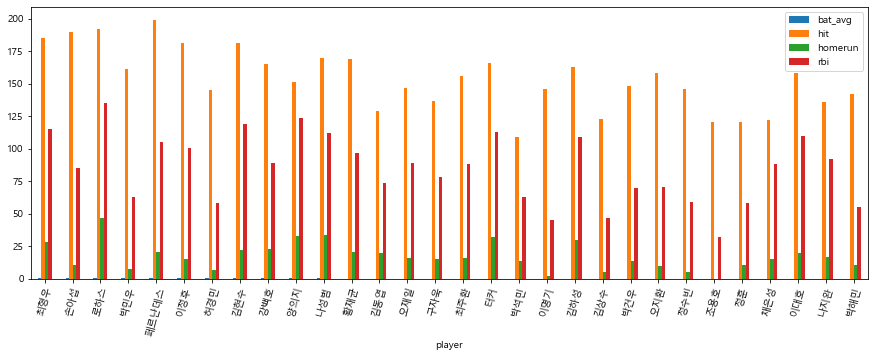

In [85]:
plt.figure()

baseballDF.plot.bar(rot=75, figsize=(15,5))

plt.show()
plt.close()

### image scraping

In [86]:
from urllib.parse import quote_plus # 자동으로 인코딩되는 것들을 디코딩시켜주기 위해

In [90]:
baseUrl       = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
searchKeyword = input('검색어 입력 : ')
maxCnt        = int(input('scraping num : '))

url = baseUrl+quote_plus(searchKeyword) # quote_plus를 이용해서 자동으로 한글 변환

try :
    html = urlopen(url)
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error') 
else:
    soup = BeautifulSoup(html.read(), 'html.parser')

soup

검색어 입력 : 강아지
scraping num : 30


<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="강아지 : 네이버 이미지검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'강아지'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'강아지'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>강아지 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210304.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst

In [116]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210309'

try :
    html = urlopen(url)
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error') 
else:
    soup = BeautifulSoup(html.read(), 'html.parser')

soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210309" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [136]:
# 영화명
# 방법 3가지
soup.find_all('div', {'class':'tit5'})[0].a.get_text()
soup.find_all('div', {'class':'tit5'})[0].a.text
soup.find_all('div', {'class':'tit5'})[0].a.string 

'원더'

In [119]:
soup.find_all('td', 'point')[0].string

'9.51'

In [139]:
# 영화제목만 리스트를 만들기
movie_list = [soup.find_all('div', 'tit5')[n].a.string for n in range(0,50)]
point_list = [soup.find_all('td', 'point')[n].string for n in range(0,50)]

In [152]:
# 날짜 생성(50) 오늘 날짜를 기준으로 50일 날짜 생성
# 날짜, 영화명, 포인트, 데이타 프레임 생성
date_list = pd.date_range('2021-03-10', periods=50)

In [155]:
movieDF = pd.DataFrame({
    '날짜'  : date_list,
    '영화명': movie_list,
    '포인트': point_list
})
movieDF.head()

,날짜,영화명,포인트
0,2021-03-10,원더,9.51
1,2021-03-11,극장판 바이올렛 에버가든,9.50
2,2021-03-12,동주,9.37
3,2021-03-13,서유기 2 - 선리기연,9.36
4,2021-03-14,부활: 그 증거,9.34


In [156]:
movieDF['포인트'] = movieDF['포인트'].astype(float)
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      50 non-null     datetime64[ns]
 1   영화명     50 non-null     object        
 2   포인트     50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ KB


In [161]:
movieDF.sort_values(by='포인트', ascending=False, inplace=True)

In [166]:
movieDF = movieDF.reset_index('영화명')

In [167]:
movieDF

,영화명,날짜,포인트
0,원더,2021-03-10,9.51
1,극장판 바이올렛 에버가든,2021-03-11,9.50
2,동주,2021-03-12,9.37
3,서유기 2 - 선리기연,2021-03-13,9.36
4,부활: 그 증거,2021-03-14,9.34
5,소울,2021-03-15,9.31
6,엽기적인 그녀,2021-03-16,9.29
7,"나, 다니엘 블레이크",2021-03-17,9.28
8,극장판 귀멸의 칼날: 무한열차편,2021-03-18,9.27
9,똥파리,2021-03-19,9.22


### 스크래핑 실습 & 워드 클라우드

In [169]:
url = 'https://m.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'

try :
    html = urlopen(url)
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error') 
else:
    soup = BeautifulSoup(html.read(), 'html.parser', from_encoding='utf-8')

soup


<!DOCTYPE html>

<html class="touch" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="-41chk8SjktlW5suRZ4hSSArjxmVu7i89S2ljNh8_a8" name="google-site-verification"/>
<meta content="C1DACEF2769068C0B0D2687C9E5105FA" name="msvalidate.01"/>
<meta content="tt4154756" property="pageId">
<meta content="title" property="pageType">
<meta content="reviews" property="subpageType">
<link href="https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_UY1200_CR90,0,630,1200_AL_.jpg" rel="image_src"/>
<meta content="https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_UY1200_CR90,0,630,1200_AL_.jpg" property

- 점수 (별점), 리뷰제목, 작성자 닉네임, 작성날짜, 리뷰내용

In [175]:
soup.find_all('div', {'class': 'imdb-user-review'})

[<div class="imdb-user-review collapsable" data-review-id="rw6506593" data-title-id="tt4154756">
 <div class="review-container">
 <div class="review-header">
 <div class="display-name-date">
 <a class="display-name-link" href="/user/ur89226807/">cartermain</a><span class="review-date">20 January 2021</span>
 </div>
 <div>
 <a class="title" href="/review/rw6506593/"> A film that pulled off the impossible.
 </a> </div>
 </div>
 <div class="content">
 <div class="text">Avengers: Infinity War is a film that should be utter crap. A franchise stretching almost twenty films is unheard of. And making a great and satisfying climax to that franchise is nearly impossible. Considering how many characters Marvel had to juggle together with this movie, there was almost no way this movie wouldn't suck.<br/><br/>But it didn't. Marvel pulled it off. All of the characters were balanced seemingly effortlessly. The action was amazing. The characters were funny. The story was compelling. Marvel made what s

### 자연어처리
(cmd)
- JDK 설치 및 JAVA_HOME
- conda install konlpy 혹은 pip install konlpy

- python
- import nltk
- nltk.download(stopwords, punkt)

(conda)
- conda install -c conda-forge jpype1
- conda install -c conda-forge wordcloud
- conda install -c confa-forge gensim # 유사도매핑


(버전해결)

- https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
- pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl

(Kkma)
- http://kkma.snu.ac.kr/documents/index.jsp?doc=postag

In [3]:
from konlpy.tag import Kkma
from wordcloud import WordCloud, STOPWORDS

In [4]:
kkoma = Kkma()

In [5]:
kkoma.nouns('한국어 문장 분석 시작')

['한국어', '문장', '분석', '시작']

In [8]:
kkoma.sentences('한국어 문장 분석을 시작한다. 문장으로도 분석이 된다.')

['한국어 문장 분석을 시작한다.', '문장으로도 분석이 된다.']

In [9]:
kkoma.pos('한국어 문장 분석을 시작한다. 문장으로도 분석이 된다.')

[('한국어', 'NNG'),
 ('문장', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF'),
 ('문장', 'NNG'),
 ('으로', 'JKM'),
 ('도', 'JX'),
 ('분석', 'NNG'),
 ('이', 'JKC'),
 ('되', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [12]:
import numpy as np
from PIL import Image

In [19]:
text = open('./data/07. alice.txt').read()
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [26]:
maskimg = np.array(Image.open('./data/07. alice_mask.png'))
maskimg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [27]:
# 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

<function matplotlib.pyplot.show(close=None, block=None)>

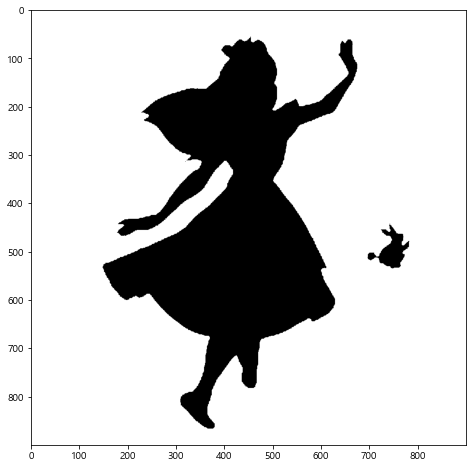

In [29]:
plt.figure(figsize=(8,8))
plt.imshow(maskimg, cmap=plt.cm.gray)
plt.show

In [37]:
sw = set(STOPWORDS)
sw.add('said')
wc = WordCloud(mask=maskimg, max_words=2000, background_color='white')

In [38]:
wc = wc.generate(text)

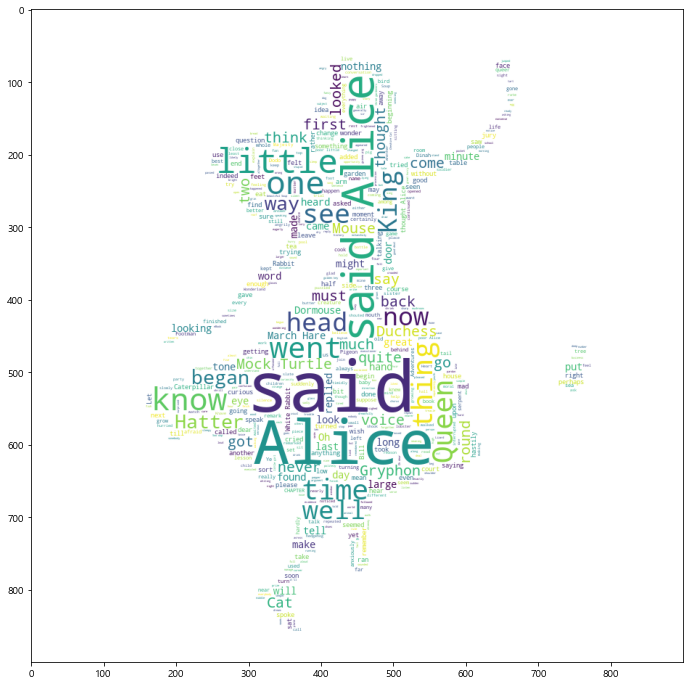

In [39]:
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.show()
plt.close()